November 28, 2024

Goal: Perform equivalence and non-equivalence checking using benchmark circuits from `feynman/benchmarks`

Step 1: Figure out how to load and "compile" the circuits

In [1]:
!pwd

/home/abhishekabhishek/git/cpsc-513-project/sandbox


In [2]:
cd ..

/home/abhishekabhishek/git/cpsc-513-project


let's consider `qft_4.qasm` as an example circuit

In [6]:
qft_4_path = "../feynman/benchmarks/qasm/qft_4.qasm"

from qiskit import QuantumCircuit
qft_4_circ = QuantumCircuit.from_qasm_file(qft_4_path)

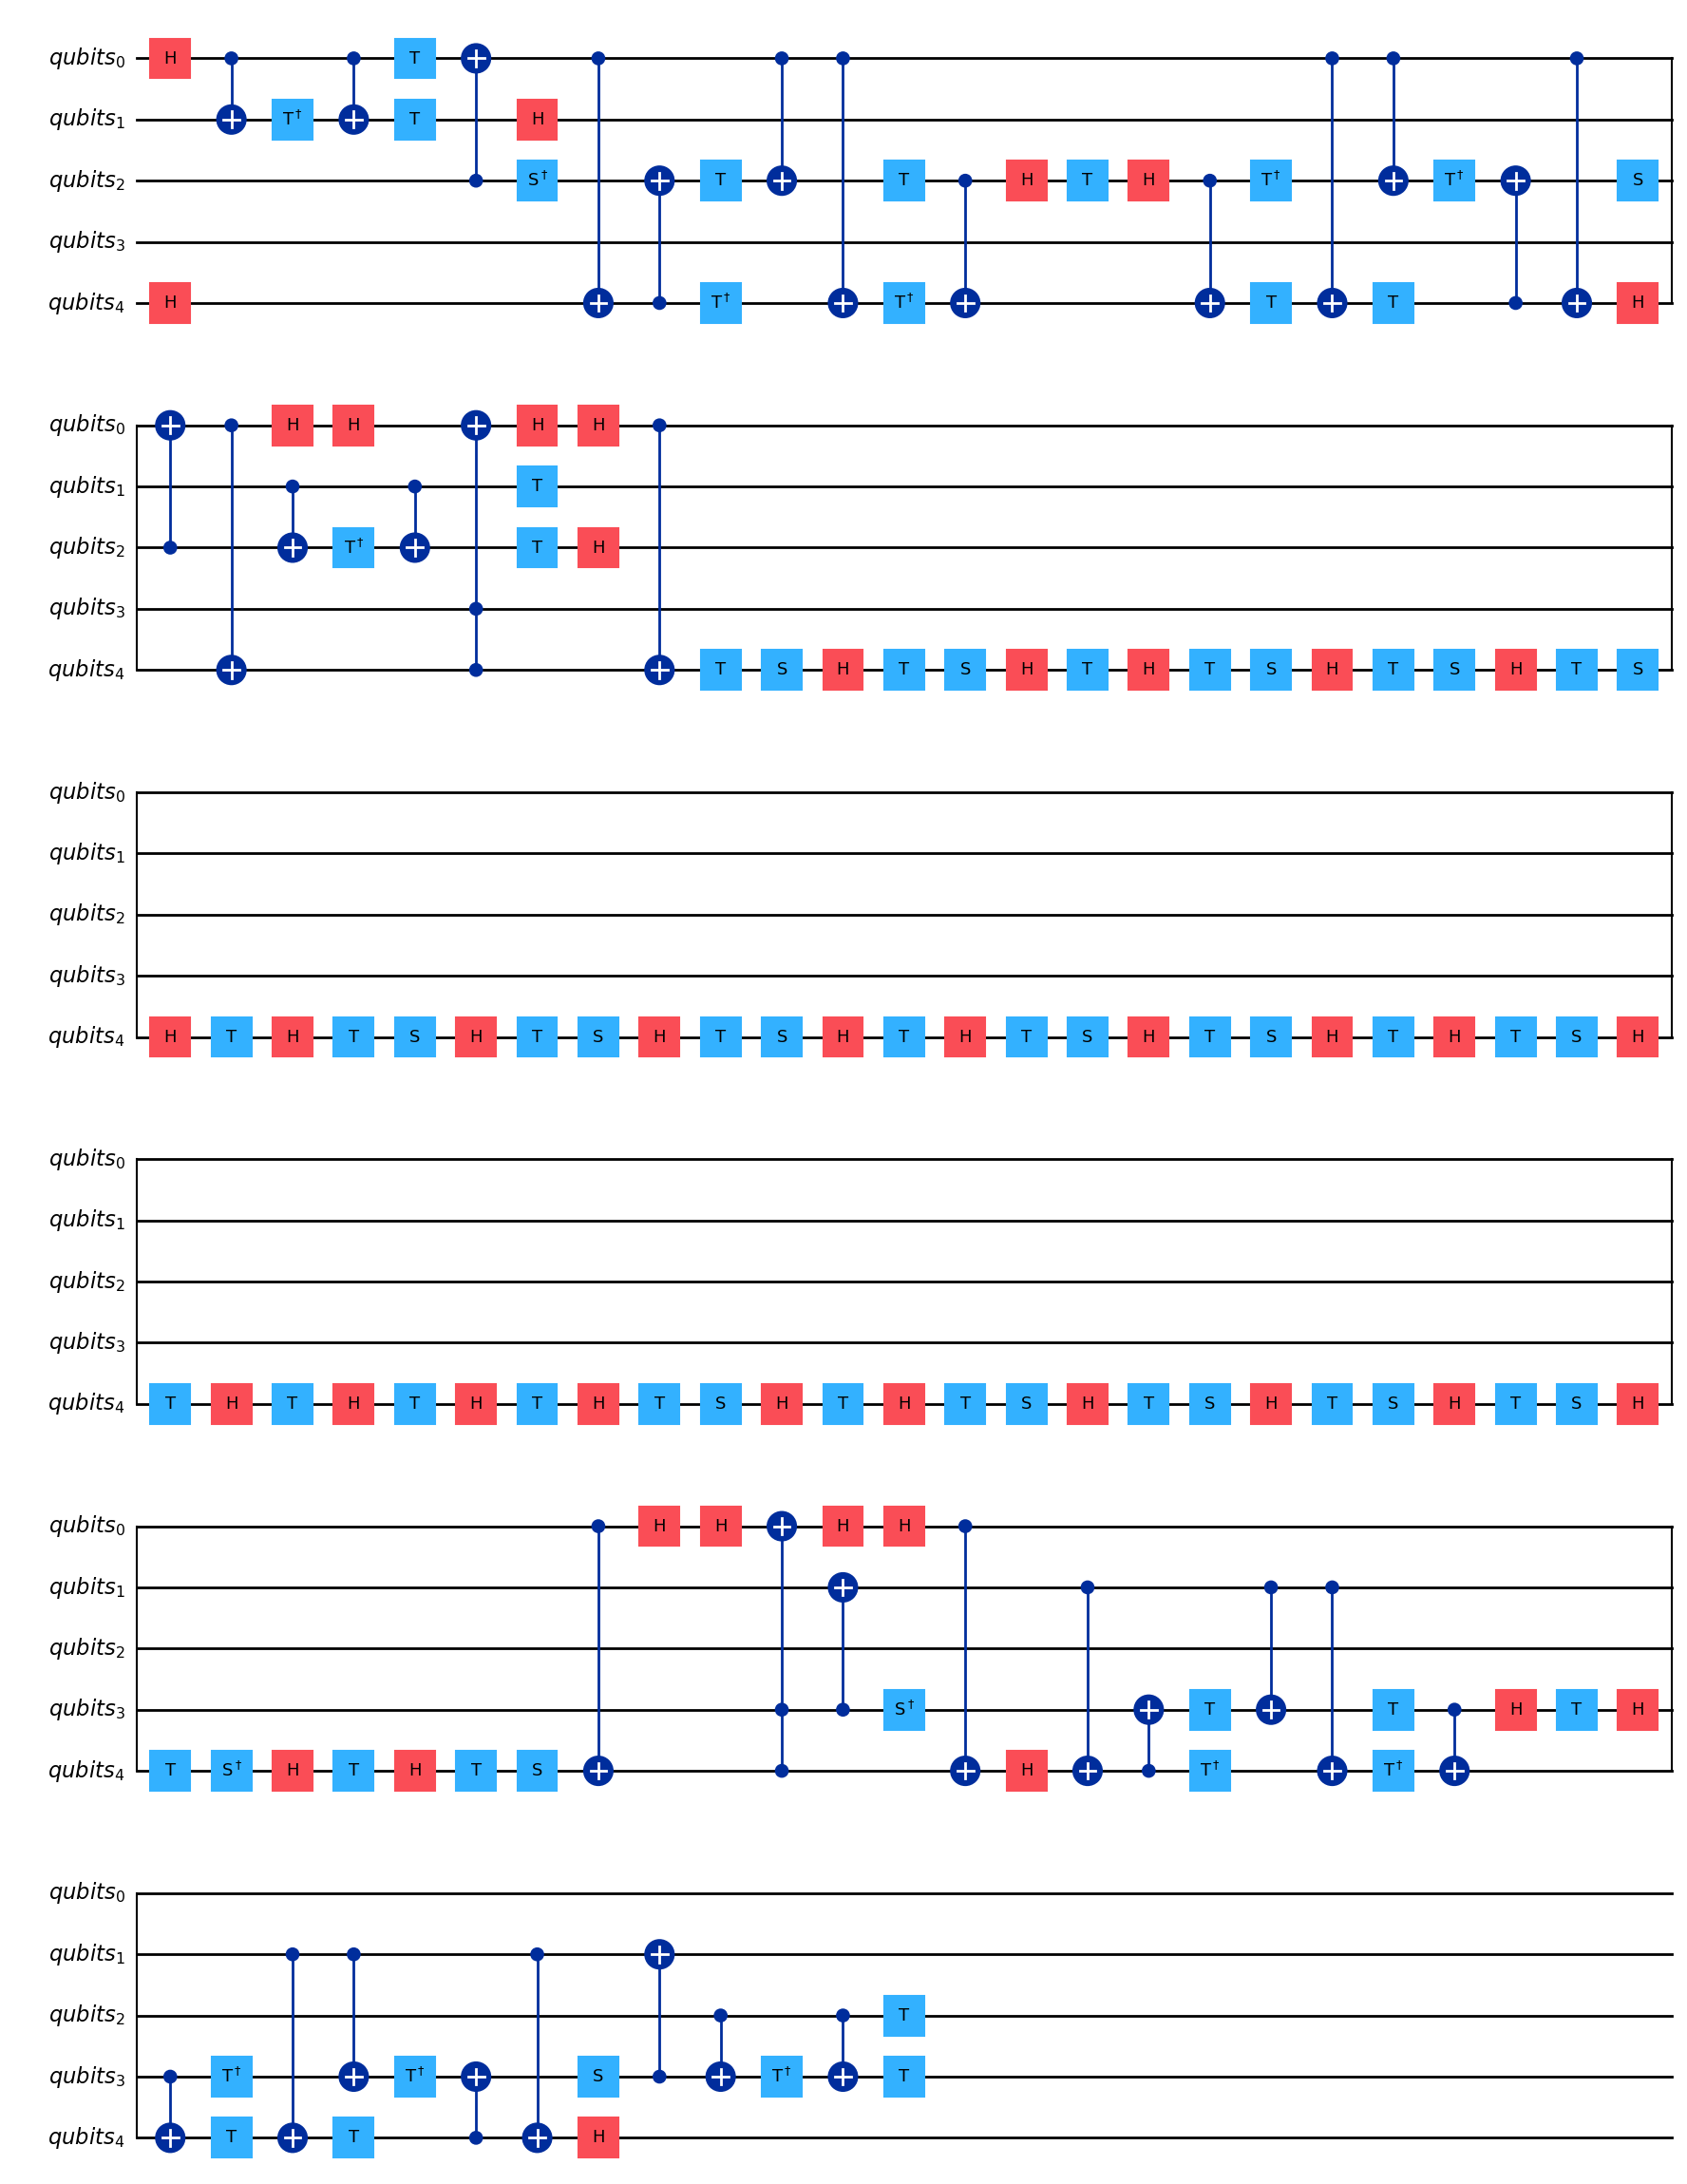

In [7]:
qft_4_circ.draw(output="mpl")

From the above, we observe that all the `.qasm` circuits in `feynman/benchmarks` are compiled to the Clifford+T gate set. So, what procedure can we perform on this circuit that would result in an interesting equivalence checking problem? Additionally, does the `qcec` framework support the Clifford+T gates as-is?

In [8]:
from mqt import qcec
qcec.verify(qft_4_circ, qft_4_circ)

<EquivalenceCheckingManager.Results: equivalent>

Let's attempt to transpile to an actual IBM backend and then perform DD-based equivalence checking:

In [9]:
from keys import IBMQ_API

from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService(channel="ibm_quantum", token=IBMQ_API, instance="ibm-q/open/main")
service.backends()

[<IBMBackend('ibm_kyiv')>,
 <IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_sherbrooke')>]

In [10]:
ibm_backend = service.backend("ibm_sherbrooke")
print(ibm_backend)

<IBMBackend('ibm_sherbrooke')>


In [11]:
from qiskit import transpile
qft_4_circ_hw = transpile(qft_4_circ, ibm_backend)

In [12]:
qft_4_circ_hw.draw(output="mpl")

ValueError: Image size of 2412x160483 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 2412.47x160483 with 1 Axes>

December 1st, 2024

Verifying qiskit transpilation for a specific backend using `qcec`

In [13]:
qcec.verify(qft_4_circ, qft_4_circ_hw)

<EquivalenceCheckingManager.Results: not_equivalent>

The above returns `not_equivalent` potentially due to the missing measurements at the end of the circuit.

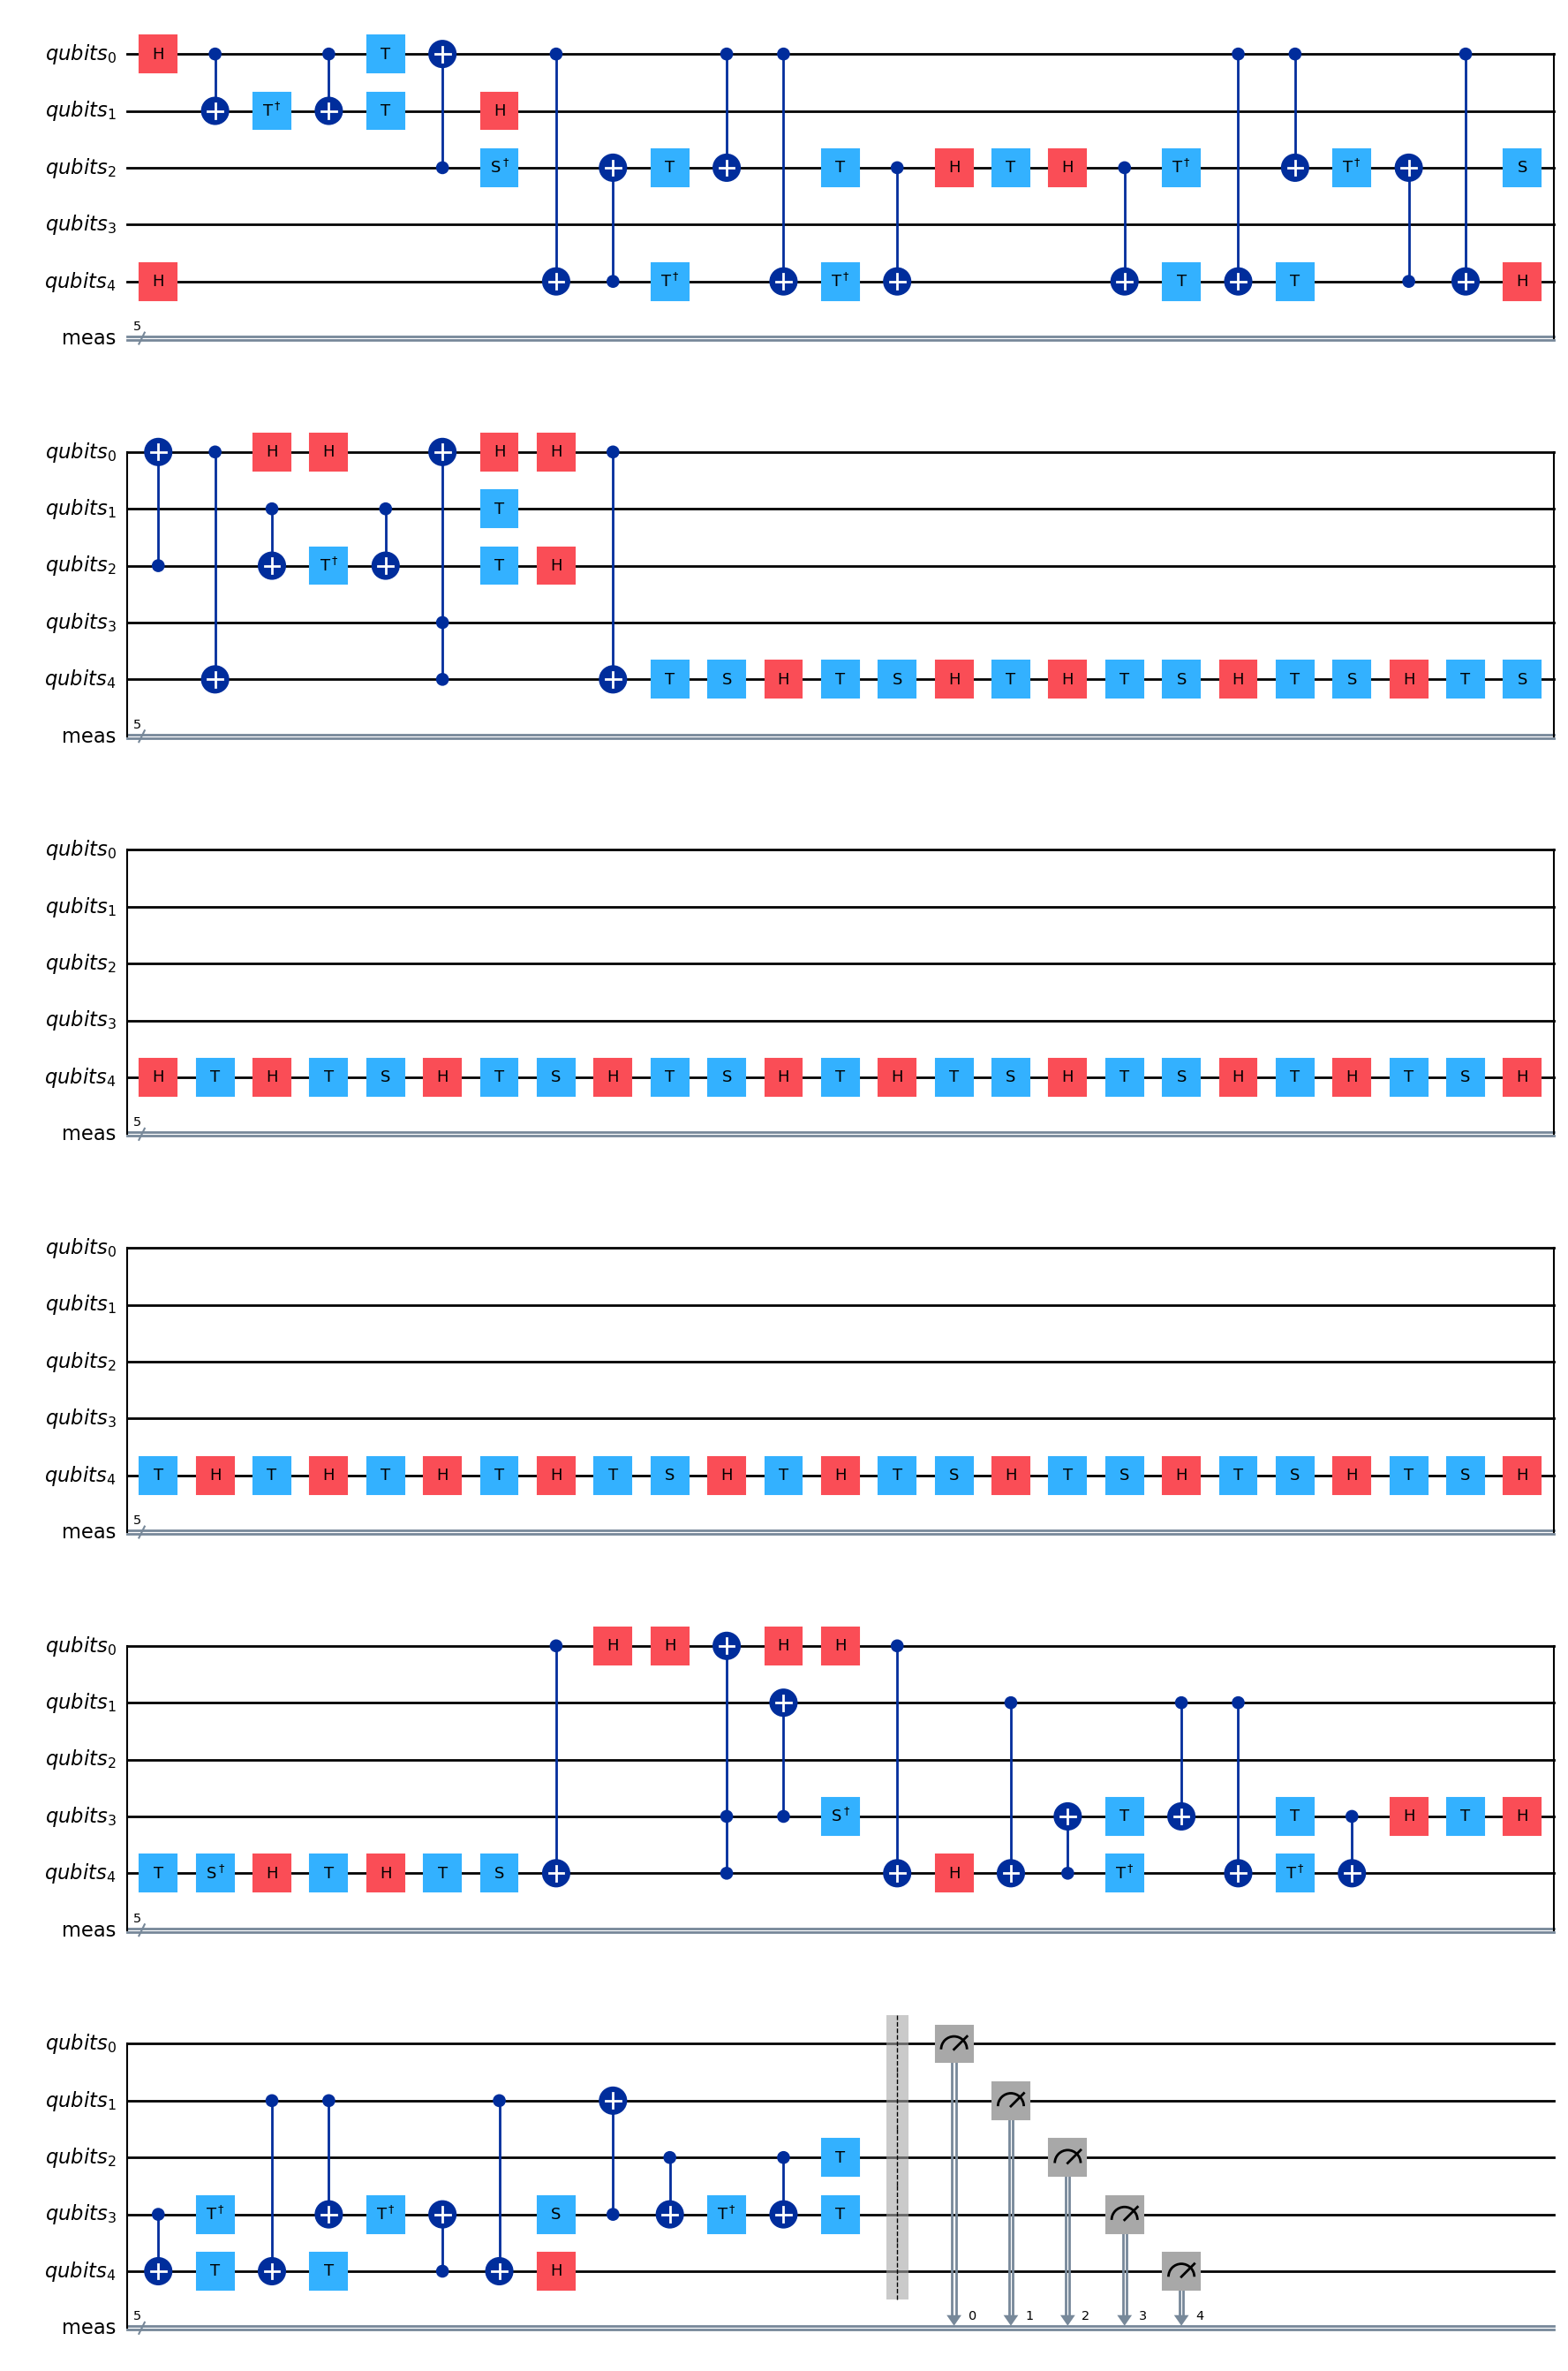

In [14]:
qft_4_circ.measure_all()
qft_4_circ.draw(output="mpl")

In [15]:
from qiskit import transpile
qft_4_circ_hw = transpile(qft_4_circ, ibm_backend)

In [16]:
qcec.verify(qft_4_circ, qft_4_circ_hw)

<EquivalenceCheckingManager.Results: equivalent_up_to_global_phase>

So far we've used the default settings for equivalence checking but now we would like to configure specific options for configuring the equivalence checker.

In [17]:
from mqt.qcec import Configuration

In [ ]:
config = Configuration()